<a href="https://colab.research.google.com/github/jselvarathinam/CSE_5334_Final_Project/blob/main/CSE5334_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Packages and Data

In [112]:
#Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [113]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [114]:
#Importing Necessary packages
import os
import tensorflow as tf
import random
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import zipfile
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os, shutil, math, cv2, json, random
from tqdm import tqdm
from keras.layers import *
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm
from PIL import Image
from numpy import asarray
from matplotlib.image import imread

In [115]:
"""
The following four cells make a kaggle directory in this workspace and download the caltech101 dataset into it.
I learned how to do this from the following youtube tutorial: https://www.youtube.com/watch?v=yEXkEUqK52Q. I think 
this code is fairly common but I wanted to include a reference just in case.
"""
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [116]:
! cp /content/drive/MyDrive/ColabNotebooks/kaggle.json ~/.kaggle/kaggle.json

In [117]:
! chmod 600 ~/.kaggle/kaggle.json

In [118]:
! kaggle datasets download -d whenamancodes/wild-animals-images #Need to download only specific folders
! mkdir wild-animals-images
! mv wild-animals-images.zip wild-animals-images
%cd wild-animals-images

100% 0.98G/0.98G [00:05<00:00, 169MB/s]
100% 0.98G/0.98G [00:05<00:00, 184MB/s]
mkdir: cannot create directory ‘wild-animals-images’: File exists
/content/wild-animals-images/wild-animals-images/wild-animals-images


In [119]:
! unzip wild-animals-images.zip

Archive:  wild-animals-images.zip
  inflating: cheetah-resize-224/resize-224/00000000_224resized.png  
  inflating: cheetah-resize-224/resize-224/00000001_224resized.png  
  inflating: cheetah-resize-224/resize-224/00000002_224resized.png  
  inflating: cheetah-resize-224/resize-224/00000003_224resized.png  
  inflating: cheetah-resize-224/resize-224/00000004_224resized.png  
  inflating: cheetah-resize-224/resize-224/00000005_224resized.png  
  inflating: cheetah-resize-224/resize-224/00000007_224resized.png  
  inflating: cheetah-resize-224/resize-224/00000008_224resized.png  
  inflating: cheetah-resize-224/resize-224/00000009_224resized.png  
  inflating: cheetah-resize-224/resize-224/00000010_224resized.png  
  inflating: cheetah-resize-224/resize-224/00000011_224resized.png  
  inflating: cheetah-resize-224/resize-224/00000012_224resized.png  
  inflating: cheetah-resize-224/resize-224/00000014_224resized.png  
  inflating: cheetah-resize-224/resize-224/00000015_224resized.png  


In [120]:
! rm -r cheetah-resize-224
! rm -r cheetah-resize-512
! rm -r fox-resize-224
! rm -r fox-resize-512
! rm -r hyena-resize-224
! rm -r hyena-resize-512
! rm -r lion-resize-224
! rm -r lion-resize-512
! rm -r tiger-resize-224
! rm -r tiger-resize-512
! rm -r wolf-resize-224
! rm -r wolf-resize-512

rm: cannot remove 'cheetah-resize-512': No such file or directory
rm: cannot remove 'fox-resize-224': No such file or directory
rm: cannot remove 'fox-resize-512': No such file or directory
rm: cannot remove 'hyena-resize-224': No such file or directory
rm: cannot remove 'hyena-resize-512': No such file or directory
rm: cannot remove 'lion-resize-224': No such file or directory
rm: cannot remove 'lion-resize-512': No such file or directory
rm: cannot remove 'tiger-resize-224': No such file or directory
rm: cannot remove 'tiger-resize-512': No such file or directory
rm: cannot remove 'wolf-resize-224': No such file or directory
rm: cannot remove 'wolf-resize-512': No such file or directory


In [121]:
%cd /content/wild-animals-images/wild-animals-images
! mkdir cheetah
! mkdir fox
! mkdir hyena
! mkdir lion
! mkdir tiger
! mkdir wolf

/content/wild-animals-images/wild-animals-images
mkdir: cannot create directory ‘cheetah’: File exists
mkdir: cannot create directory ‘fox’: File exists
mkdir: cannot create directory ‘hyena’: File exists
mkdir: cannot create directory ‘lion’: File exists
mkdir: cannot create directory ‘tiger’: File exists
mkdir: cannot create directory ‘wolf’: File exists


In [122]:
! mv /content/wild-animals-images/cheetah-resize-300/resize-300/* /content/wild-animals-images/cheetah
! mv /content/wild-animals-images/fox-resize-300/fox-resize-300/* /content/wild-animals-images/fox
! mv /content/wild-animals-images/hyena-resize-300/resize-300/* /content/wild-animals-images/hyena
! mv /content/wild-animals-images/lion-resize-300/lion-resize-300/* /content/wild-animals-images/lion
! mv /content/wild-animals-images/tiger-resize-300/tiger-resize-300/* /content/wild-animals-images/tiger
! mv /content/wild-animals-images/wolf-resize-300/wolf-resize-300/* /content/wild-animals-images/wolf

! rm -r /content/wild-animals-images/cheetah-resize-300
! rm -r /content/wild-animals-images/fox-resize-300
! rm -r /content/wild-animals-images/hyena-resize-300
! rm -r /content/wild-animals-images/lion-resize-300
! rm -r /content/wild-animals-images/tiger-resize-300
! rm -r /content/wild-animals-images/wolf-resize-300
! rm -r /content/wild-animals-images/wild-animals-images.zip

mv: cannot stat '/content/wild-animals-images/cheetah-resize-300/resize-300/*': No such file or directory
mv: cannot stat '/content/wild-animals-images/fox-resize-300/fox-resize-300/*': No such file or directory
mv: cannot stat '/content/wild-animals-images/hyena-resize-300/resize-300/*': No such file or directory
mv: cannot stat '/content/wild-animals-images/lion-resize-300/lion-resize-300/*': No such file or directory
mv: cannot stat '/content/wild-animals-images/tiger-resize-300/tiger-resize-300/*': No such file or directory
mv: cannot stat '/content/wild-animals-images/wolf-resize-300/wolf-resize-300/*': No such file or directory
rm: cannot remove '/content/wild-animals-images/cheetah-resize-300': No such file or directory
rm: cannot remove '/content/wild-animals-images/fox-resize-300': No such file or directory
rm: cannot remove '/content/wild-animals-images/hyena-resize-300': No such file or directory
rm: cannot remove '/content/wild-animals-images/lion-resize-300': No such file 

# Creating Training, Testing, Validation Data on 80/10/10 split


In [138]:
'''
This code in this cell is from https://www.kaggle.com/code/jiaowoguanren/airplanes-motorbikes-schooners-tf-efficientnet 
I used it to create a train/test/validate split for my data. (It also helped me in the next cell to understand I needed to use the 
".flow_from_dataframe" when generating batches of images and labels for training, testing and validating the neural net). 
'''
sdir = '/content/wild-animals-images'

#Defining function that creates training, testing, and validation dataframes
def make_dataframes(sdir):
    bad_images = []
    good_ext = ['jpg', 'jpeg', 'png', 'tiff']
    filepaths = []
    labels = []
    classes = sorted(os.listdir(sdir))
    for klass in classes:
        classpath = os.path.join(sdir, klass)
        flist = sorted(os.listdir(classpath))
        desc = f'{klass:23s}'
        for f in tqdm(flist, ncols=110, desc=desc, unit='file', colour='blue'):
            fpath = os.path.join(classpath, f)
            fl = f.lower()
            index = fl.rfind('.')
            ext = fl[index + 1:]
            if ext in good_ext:
                try:
                    img = cv2.imread(fpath)
                    shape = img.shape
                    filepaths.append(fpath)
                    labels.append(klass)
                except:
                    bad_images.append(fpath)
                    print('defective image file: ', fpath)
            else:
                bad_images.append(fpath)
    Fseries = pd.Series(filepaths, name='filepaths')
    Lseries = pd.Series(labels, name='labels')
    df = pd.concat([Fseries, Lseries], axis=1)

    train_df, dummy_df = train_test_split(df, train_size=.8, shuffle=True, random_state=123, stratify=df['labels'])
    valid_df, test_df = train_test_split(dummy_df, train_size=.5, shuffle=True, random_state=123,
                                         stratify=dummy_df['labels'])
    classes = sorted(train_df['labels'].unique())
    class_count = len(classes)
    sample_df = train_df.sample(n=50, replace=False)

    ht = 0
    wt = 0
    count = 0
    
    for i in range(len(sample_df)):
        fpath = sample_df['filepaths'].iloc[i]
        try:
            img = cv2.imread(fpath)
            h = img.shape[0]
            w = img.shape[1]
            wt += w
            ht += h
            count += 1
        except:
            pass
    have = int(ht / count)
    wave = int(wt / count)
    aspect_ratio = have / wave
    print('number of classes in processed dataset= ', class_count)
    counts = list(train_df['labels'].value_counts())
    print('the maximum files in any class in train_df is ', max(counts),
          '  the minimum files in any class in train_df is ', min(counts))
    print('train_df length: ', len(train_df), '  test_df length: ', len(test_df), '  valid_df length: ', len(valid_df))
    print('average image height= ', have, '  average image width= ', wave, ' aspect ratio h/w= ', aspect_ratio)
    return train_df, test_df, valid_df, classes, class_count

#Create training, testing, and validation dataframes
train_df, test_df, valid_df, classes, class_count = make_dataframes(sdir)

cheetah                :  61%|██████████████████████████▎                | 210/343 [00:00<00:00, 231.30file/s]

defective image file:  /content/wild-animals-images/cheetah/00000244_300resized.png


hyena                  :  62%|██████████████████████████▌                | 189/306 [00:00<00:00, 230.76file/s]

defective image file:  /content/wild-animals-images/hyena/00000224_300resized.png


wolf                   : 100%|███████████████████████████████████████████| 263/263 [00:01<00:00, 233.54file/s]


number of classes in processed dataset=  6
the maximum files in any class in train_df is  274   the minimum files in any class in train_df is  200
train_df length:  1378   test_df length:  173   valid_df length:  172
average image height=  300   average image width=  300  aspect ratio h/w=  1.0


# Convolutional Neural Network Run 1

In [28]:
"""
The code in this cell and the next 2 cells is loosely based on the code in the following tutorial: 
https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/Course%202%20-%20Part%208%20-%20Lesson%202%20-%20Notebook%20(RockPaperScissors).ipynb#scrollTo=ZABJp7T3VLCU
I say loosely based because while I learned the essence of how to set up, compile and fit the model from this tutorial it would not have worked for the problem I am trying to solve,
I had to learn what all the code, parameters and hyperparamters meant from documentation and tutorials (that I've linked in my blog post) and then write code that would actually work for 
my particular problem. Therefore these next few cells are where most of my unique contributions are.
"""
#Rescaling images
train_datagen = ImageDataGenerator(rescale= 1.0/255)
test_datagen = ImageDataGenerator(rescale= 1.0/255)
valid_datagen = ImageDataGenerator(rescale= 1.0/255) 

#Generating batches of images for training, validation, and testing along with their labels to be fed into the neural net
#Read documentation on .flow_from_dataframe() from tensorflow website: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow_from_dataframe
train_data = train_datagen.flow_from_dataframe(train_df, x_col = "filepaths", y_col = "labels", batch_size =50, class_mode= "categorical", target_size = (224,224))
test_data = test_datagen.flow_from_dataframe(test_df, x_col = "filepaths", y_col = "labels", batch_size =50, class_mode= "categorical", target_size = (224,224))
valid_data = valid_datagen.flow_from_dataframe(valid_df, x_col = "filepaths", y_col = "labels", batch_size =50, class_mode= "categorical", target_size = (224,224))

Found 1378 validated image filenames belonging to 6 classes.
Found 173 validated image filenames belonging to 6 classes.
Found 172 validated image filenames belonging to 6 classes.


In [30]:
#Building the model
model = tf.keras.models.Sequential([
    
    #First convolution Layer
    tf.keras.layers.Conv2D(16, (3,3), activation= "relu", input_shape= (224,224,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    #Second convolution layer
    tf.keras.layers.Conv2D(32, (3,3), activation= "relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    #Flattening to feed into DNN
    tf.keras.layers.Flatten(),

    #Hidden Layer with 512 neurons
    tf.keras.layers.Dense(512, activation= 'relu'),

    #Output layer
    tf.keras.layers.Dense(6, activation= 'softmax')

    ])

model.compile(loss= "mean_squared_error", optimizer= RMSprop(lr=0.001), metrics = ["acc"])


In [27]:
#Fitting the model
history = model.fit(train_data, 
                    epochs = 20, 
                    steps_per_epoch = 5, 
                    validation_data = valid_data, 
                    validation_steps = 5)

Epoch 1/20
1/5 [=====>........................] - ETA: 17s - loss: 0.1374 - acc: 0.2800

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


5/5 [==============================] - ETA: 0s - loss: 0.2634 - acc: 0.1272

5/5 [==============================] - 19s 4s/step - loss: 0.2634 - acc: 0.1272 - val_loss: 0.2810 - val_acc: 0.1570
Epoch 2/20
5/5 [==============================] - 13s 3s/step - loss: 0.2853 - acc: 0.1440
Epoch 3/20
5/5 [==============================] - 13s 2s/step - loss: 0.2893 - acc: 0.1320
Epoch 4/20
5/5 [==============================] - 13s 2s/step - loss: 0.2787 - acc: 0.1640
Epoch 5/20
5/5 [==============================] - 12s 2s/step - loss: 0.2895 - acc: 0.1316
Epoch 6/20
5/5 [==============================] - 12s 2s/step - loss: 0.2865 - acc: 0.1404
Epoch 7/20
5/5 [==============================] - 15s 3s/step - loss: 0.2907 - acc: 0.1280
Epoch 8/20
5/5 [==============================] - 13s 3s/step - loss: 0.2840 - acc: 0.1480
Epoch 9/20
5/5 [==============================] - 13s 3s/step - loss: 0.2880 - acc: 0.1360
Epoch 10/20
5/5 [==============================] - 15s 3s/step - loss: 0.2867 - acc: 0.1400
Epoch 11/20
5/5 [==============================] - 13s 2s/step 

# Convolutional Neural Network Run 2

In [31]:
#Building the model
model = tf.keras.models.Sequential([
    
    #First convolution Layer
    tf.keras.layers.Conv2D(16, (3,3), activation= "relu", input_shape= (224,224,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    #Second convolution layer
    tf.keras.layers.Conv2D(32, (3,3), activation= "relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    #Third convolution layer
    tf.keras.layers.Conv2D(64, (3,3), activation= "relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    #Fourth convolution layer
    tf.keras.layers.Conv2D(128, (3,3), activation= "relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    #Flattening to feed into DNN
    tf.keras.layers.Flatten(),

    #Hidden Layer with 512 neurons
    tf.keras.layers.Dense(512, activation= 'relu'),

    #Output layer
    tf.keras.layers.Dense(6, activation= 'softmax')

    ])

model.compile(loss= "mean_squared_error", optimizer= RMSprop(lr=0.001), metrics = ["acc"])


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [32]:
#Fitting the model
history = model.fit(train_data, 
                    epochs = 20, 
                    steps_per_epoch = 5, 
                    validation_data = valid_data, 
                    validation_steps = 5)

Epoch 1/20
4/5 [=======================>......] - ETA: 2s - loss: 0.1926 - acc: 0.1850

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


5/5 [==============================] - ETA: 0s - loss: 0.1818 - acc: 0.1800

5/5 [==============================] - 22s 4s/step - loss: 0.1818 - acc: 0.1800 - val_loss: 0.1372 - val_acc: 0.2791
Epoch 2/20
5/5 [==============================] - 13s 3s/step - loss: 0.1384 - acc: 0.2280
Epoch 3/20
5/5 [==============================] - 13s 3s/step - loss: 0.1386 - acc: 0.1480
Epoch 4/20
5/5 [==============================] - 13s 3s/step - loss: 0.1418 - acc: 0.1680
Epoch 5/20
5/5 [==============================] - 14s 3s/step - loss: 0.1365 - acc: 0.2680
Epoch 6/20
5/5 [==============================] - 12s 2s/step - loss: 0.1346 - acc: 0.2763
Epoch 7/20
5/5 [==============================] - 14s 3s/step - loss: 0.1348 - acc: 0.2680
Epoch 8/20
5/5 [==============================] - 13s 3s/step - loss: 0.1322 - acc: 0.2520
Epoch 9/20
5/5 [==============================] - 16s 3s/step - loss: 0.1290 - acc: 0.3280
Epoch 10/20
5/5 [==============================] - 14s 3s/step - loss: 0.1247 - acc: 0.3400
Epoch 11/20
5/5 [==============================] - 14s 3s/step 

# Convolutional Neural Network Run 3

In [35]:
#Building the model
model = tf.keras.models.Sequential([
    
    #First convolution Layer
    tf.keras.layers.Conv2D(16, (3,3), activation= "relu", input_shape= (224,224,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    #Second convolution layer
    tf.keras.layers.Conv2D(32, (3,3), activation= "relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    #Third convolution layer
    tf.keras.layers.Conv2D(64, (3,3), activation= "relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    #Fourth convolution layer
    tf.keras.layers.Conv2D(128, (3,3), activation= "relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    #Flattening to feed into DNN
    tf.keras.layers.Flatten(),

    #Hidden Layer with 512 neurons
    tf.keras.layers.Dense(512, activation= 'relu'),

    #Output layer
    tf.keras.layers.Dense(6, activation= 'softmax')

    ])

model.compile(loss= "mean_squared_error", optimizer= RMSprop(lr=0.001), metrics = ["acc"])

In [36]:
#Fitting the model
history = model.fit(train_data, 
                    epochs = 20, 
                    steps_per_epoch = 10, 
                    validation_data = valid_data, 
                    validation_steps = 5)

Epoch 1/20
10/10 [==============================] - ETA: 0s - loss: 0.2556 - acc: 0.1440

10/10 [==============================] - 34s 3s/step - loss: 0.2556 - acc: 0.1440 - val_loss: 0.1636 - val_acc: 0.1570
Epoch 2/20
10/10 [==============================] - 27s 3s/step - loss: 0.1411 - acc: 0.1700
Epoch 3/20
10/10 [==============================] - 26s 3s/step - loss: 0.1383 - acc: 0.1820
Epoch 4/20
10/10 [==============================] - 29s 3s/step - loss: 0.1396 - acc: 0.2200
Epoch 5/20
10/10 [==============================] - 27s 3s/step - loss: 0.1376 - acc: 0.2620
Epoch 6/20
10/10 [==============================] - 27s 3s/step - loss: 0.1345 - acc: 0.2640
Epoch 7/20
10/10 [==============================] - 29s 3s/step - loss: 0.1364 - acc: 0.3080
Epoch 8/20
10/10 [==============================] - 25s 2s/step - loss: 0.1349 - acc: 0.3682
Epoch 9/20
10/10 [==============================] - 26s 3s/step - loss: 0.1231 - acc: 0.3900
Epoch 10/20
10/10 [==============================] - 25s 3s/step - loss: 0.1194 - acc: 0.4017
Epoch 11/20
10/10 [========================

# Convolutional Neural Network Run 4

In [ ]:
#Building the model
model = tf.keras.models.Sequential([
    
    #First convolution Layer
    tf.keras.layers.Conv2D(16, (3,3), activation= "relu", input_shape= (224,224,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    #Second convolution layer
    tf.keras.layers.Conv2D(32, (3,3), activation= "relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    #Third convolution layer
    tf.keras.layers.Conv2D(64, (3,3), activation= "relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    #Fourth convolution layer
    tf.keras.layers.Conv2D(128, (3,3), activation= "relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    #Flattening to feed into DNN
    tf.keras.layers.Flatten(),

    #Hidden Layer with 512 neurons
    tf.keras.layers.Dense(512, activation= 'relu'),

    #Output layer
    tf.keras.layers.Dense(6, activation= 'softmax')

    ])

model.compile(loss= "mean_squared_error", optimizer= RMSprop(lr=0.001), metrics = ["acc"])

In [39]:
#Fitting the model
history = model.fit(train_data, 
                    epochs = 20, 
                    steps_per_epoch = 20, 
                    validation_data = valid_data, 
                    validation_steps = 5)

Epoch 1/20
20/20 [==============================] - ETA: 0s - loss: 0.2674 - acc: 0.1677

20/20 [==============================] - 59s 3s/step - loss: 0.2674 - acc: 0.1677 - val_loss: 0.2771 - val_acc: 0.1686
Epoch 2/20
20/20 [==============================] - 53s 3s/step - loss: 0.1901 - acc: 0.1769
Epoch 3/20
20/20 [==============================] - 54s 3s/step - loss: 0.1389 - acc: 0.2220
Epoch 4/20
20/20 [==============================] - 54s 3s/step - loss: 0.1347 - acc: 0.2556
Epoch 5/20
20/20 [==============================] - 52s 3s/step - loss: 0.1305 - acc: 0.3630
Epoch 6/20
20/20 [==============================] - 54s 3s/step - loss: 0.1210 - acc: 0.4059
Epoch 7/20
20/20 [==============================] - 51s 3s/step - loss: 0.1107 - acc: 0.4857
Epoch 8/20
20/20 [==============================] - 54s 3s/step - loss: 0.1086 - acc: 0.4650
Epoch 9/20
20/20 [==============================] - 53s 3s/step - loss: 0.1019 - acc: 0.5204
Epoch 10/20
20/20 [==============================] - 53s 3s/step - loss: 0.0945 - acc: 0.5750
Epoch 11/20
20/20 [========================

In [50]:
#Building the model
model = tf.keras.models.Sequential([
    
    #First convolution Layer
    tf.keras.layers.Conv2D(16, (3,3), activation= "relu", input_shape= (224,224,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    #Second convolution layer
    tf.keras.layers.Conv2D(32, (3,3), activation= "relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    #Third convolution layer
    tf.keras.layers.Conv2D(64, (3,3), activation= "relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    #Fourth convolution layer
    tf.keras.layers.Conv2D(128, (3,3), activation= "relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    #Flattening to feed into DNN
    tf.keras.layers.Flatten(),

    #Hidden Layer with 512 neurons
    tf.keras.layers.Dense(512, activation= 'relu'),

    #Output layer
    tf.keras.layers.Dense(6, activation= 'softmax')

    ])

model.compile(loss= "mean_squared_error", optimizer= RMSprop(lr=0.001), metrics = ["acc"])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [51]:
#Fitting the model
history = model.fit(train_data, 
                    epochs = 20, 
                    steps_per_epoch = 25, 
                    validation_data = valid_data, 
                    validation_steps = 5)

Epoch 1/20
 5/25 [=====>........................] - ETA: 52s - loss: 0.1904 - acc: 0.1640

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


25/25 [==============================] - ETA: 0s - loss: 0.1534 - acc: 0.1946

25/25 [==============================] - 70s 3s/step - loss: 0.1534 - acc: 0.1946 - val_loss: 0.1344 - val_acc: 0.2907
Epoch 2/20
25/25 [==============================] - 68s 3s/step - loss: 0.1297 - acc: 0.3016
Epoch 3/20
25/25 [==============================] - 64s 3s/step - loss: 0.1223 - acc: 0.3803
Epoch 4/20
25/25 [==============================] - 68s 3s/step - loss: 0.1216 - acc: 0.4218
Epoch 5/20
25/25 [==============================] - 63s 3s/step - loss: 0.1121 - acc: 0.4528
Epoch 6/20
25/25 [==============================] - 67s 3s/step - loss: 0.1030 - acc: 0.5171
Epoch 7/20
25/25 [==============================] - 63s 3s/step - loss: 0.0944 - acc: 0.5594
Epoch 8/20
25/25 [==============================] - 66s 3s/step - loss: 0.0855 - acc: 0.6221
Epoch 9/20
25/25 [==============================] - 64s 3s/step - loss: 0.0753 - acc: 0.6767
Epoch 10/20
25/25 [==============================] - 64s 3s/step - loss: 0.0598 - acc: 0.7419
Epoch 11/20
25/25 [========================

ValueError: ignored

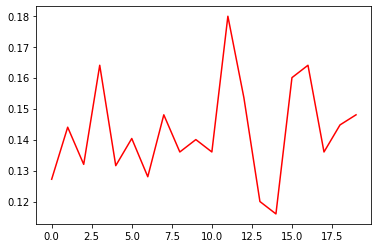

In [29]:
'''
The basics of the code for creating graphs of the training and validation accuracy per epoch came from the following tutorial provided by Google:
 https://colab.research.google.com/github/lmoroney/mlday-tokyo/blob/master/Lab6-Cats-v-Dogs.ipynb#scrollTo=dn-6c02VmqiN
 I added to the code to make the graphs more descriptive.
'''

# Retrieve a list of list results on training and test datasets for each training epoch
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

# Get number of epochs
epochs= range(len(acc)) 

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, 'r', label = "Training Accuracy")
plt.plot(epochs, val_acc, 'b', label = "Validation Accuracy")
plt.title('Training and validation accuracy per epoch')
plt.legend(loc= 2)
plt.figure
plt.show()

print(" ")   #Inserting a space between plots

# Plot training and validation loss per epoch
plt.plot(epochs, loss, 'r', label = "Training Loss")
plt.plot(epochs, val_loss, 'b', label =  "Validation Loss")
plt.title('Training and validation loss per epoch')
plt.legend(loc= 0)
plt.figure()
plt.show()

# kNN Classifier Run 1

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model = KNeighborsClassifier(n_neighbors = 5)
model.fit(train_data, classes)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


['cheetah', 'fox', 'hyena', 'lion', 'tiger', 'wolf']


# Decision Tree

In [14]:
! pip install tensorflow_decision_forests
! pip install wurlitzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
#Random Forest
label = "labels" 
import tensorflow_decision_forests as tfdf

train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_df, label=label)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_df, label=label)
train_ds

<PrefetchDataset element_spec=({'filepaths': TensorSpec(shape=(None,), dtype=tf.string, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [16]:
label = "labels" 
classes = train_df[label].unique().tolist()
print(f"Label classes: {classes}")

#dataset_df[label] = dataset_df[label].map(classes.index)

Label classes: ['lion', 'wolf', 'tiger', 'cheetah', 'fox', 'hyena']


In [19]:
#%set_cell_height 300

# Specify the model.
model_1 = tfdf.keras.RandomForestModel(verbose=2)

# Train the model.
model_1.fit(x=train_ds)

Use 2 thread(s) for training
Use /tmp/tmpkx5q4kuo as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'filepaths': <tf.Tensor 'data:0' shape=(None,) dtype=string>}
Label: Tensor("data_1:0", shape=(None,), dtype=int64)
Weights: None


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Normalized tensor features:
 {'filepaths': SemanticTensor(semantic=<Semantic.CATEGORICAL: 2>, tensor=<tf.Tensor 'data:0' shape=(None,) dtype=string>)}
Training dataset read in 0:00:05.302829. Found 1378 examples.
Training model...
Standard output detected as not visible to the user e.g. running in a notebook. Creating a training log redirection. If training get stuck, try calling tfdf.keras.set_training_logs_redirection(False).


[INFO 2022-11-30T01:37:29.780845521+00:00 kernel.cc:814] Start Yggdrasil model training
[INFO 2022-11-30T01:37:29.781055286+00:00 kernel.cc:815] Collect training examples
[INFO 2022-11-30T01:37:29.781168798+00:00 kernel.cc:423] Number of batches: 2
[INFO 2022-11-30T01:37:29.781182351+00:00 kernel.cc:424] Number of examples: 1378
[INFO 2022-11-30T01:37:29.783651068+00:00 data_spec_inference.cc:303] 1378 item(s) have been pruned (i.e. they are considered out of dictionary) for the column filepaths (0 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
[INFO 2022-11-30T01:37:29.784673724+00:00 kernel.cc:837] Training dataset:
Number of records: 1378
Number of columns: 2

Number of columns by type:
	CATEGORICAL: 2 (100%)

Columns:

CATEGORICAL: 2 (100%)
	0: "filepaths" CATEGORICAL has-dict vocab-size:1 num-oods:1378 (100%)
	1: "__LABEL" CATEGORICAL integerized vocab-size:7 no-ood-item

Terminology:
	nas: Number of non-available (i.e. missing) values.
	ood: Out of d

Model trained in 0:00:00.206287
Compiling model...


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model compiled.


In [20]:
model_1.compile(metrics=["accuracy"])
evaluation = model_1.evaluate(test_ds, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 0s 408ms/step - loss: 0.0000e+00 - accuracy: 0.1965

loss: 0.0000
accuracy: 0.1965


In [21]:
model_1.summary()

Model: "random_forest_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1
Trainable params: 0
Non-trainable params: 1
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (1):
	filepaths

No weights

Variable Importance: MEAN_MIN_DEPTH:
    1. "filepaths"  0.000000 
    2.   "__LABEL"  0.000000 

Variable Importance: NUM_AS_ROOT:

Variable Importance: NUM_NODES:

Variable Importance: SUM_SCORE:



Winner takes all: true
Out-of-bag evaluation: accuracy:0.198839 logloss:17.5876
Number of trees: 300
Total number of nodes: 300

Number of nodes by tree:
Count: 300 Average: 1 StdDev: 0
Min: 1 Max: 1 Ignored: 0
----------------------------------------------
[ 1, 1] 300 100.00% 100.00% ##########

Depth by leafs:
Count: 300 Average: 0 StdDev: 0
Min: 0 Max: 0 Ignored: 0
------------------------------------

# RNN Run 1

In [34]:
from tensorflow import keras
from tensorflow.keras import layers

"""
The code in this cell and the next 2 cells is loosely based on the code in the following tutorial: 
https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/Course%202%20-%20Part%208%20-%20Lesson%202%20-%20Notebook%20(RockPaperScissors).ipynb#scrollTo=ZABJp7T3VLCU
I say loosely based because while I learned the essence of how to set up, compile and fit the model from this tutorial it would not have worked for the problem I am trying to solve,
I had to learn what all the code, parameters and hyperparamters meant from documentation and tutorials (that I've linked in my blog post) and then write code that would actually work for 
my particular problem. Therefore these next few cells are where most of my unique contributions are.
"""
#Rescaling images
train_datagen = ImageDataGenerator(rescale= 1.0/255)
test_datagen = ImageDataGenerator(rescale= 1.0/255)
valid_datagen = ImageDataGenerator(rescale= 1.0/255) 

#Generating batches of images for training, validation, and testing along with their labels to be fed into the neural net
#Read documentation on .flow_from_dataframe() from tensorflow website: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow_from_dataframe
train_data = train_datagen.flow_from_dataframe(train_df, x_col = "filepaths", y_col = "labels", batch_size =50, class_mode= "categorical", target_size = (224,224))
test_data = test_datagen.flow_from_dataframe(test_df, x_col = "filepaths", y_col = "labels", batch_size =50, class_mode= "categorical", target_size = (224,224))
valid_data = valid_datagen.flow_from_dataframe(valid_df, x_col = "filepaths", y_col = "labels", batch_size =50, class_mode= "categorical", target_size = (224,224))

Found 1378 validated image filenames belonging to 6 classes.
Found 173 validated image filenames belonging to 6 classes.
Found 172 validated image filenames belonging to 6 classes.


In [41]:
'''
Note:the code in the next few blocks is heavily based on https://www.tensorflow.org/guide/keras/rnn.
     My original contribution is in trying to optimize the RNN by doing things such as adding different layers and trying different activation functions. 
'''
batch_size =50
input_dim = 300

In [57]:
model = keras.Sequential()
# Add an Embedding layer expecting input vocab of size 1000, and
# output embedding dimension of size 64.
#model.add(layers.Embedding(input_dim, output_dim=64))

#Add a LSTM layer with 128 internal units.
model.add(layers.LSTM(128, input_shape = (300,300,3) ,activation = 'relu', return_sequences = False))

# Add a Dense layer with 6 units.
model.add(layers.Dense(6))


print(model.summary())

ValueError: ignored

In [43]:
model.compile(loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer="sgd",
              metrics=["accuracy"],)

history = model.fit(train_data, batch_size = batch_size, epochs = 1)

InvalidArgumentError: ignored

# RNN Run 2

In [36]:
model = keras.Sequential()
model.add(keras.Input(shape = (1378,300)))
model.add(layers.SimpleRNN(128, activation = 'relu'))
model.add(layers.Dense(6))
print(model.summary())

model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer="sgd",
              metrics=["accuracy"],)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 128)               54912     
                                                                 
 dense_6 (Dense)             (None, 6)                 774       
                                                                 
Total params: 55,686
Trainable params: 55,686
Non-trainable params: 0
_________________________________________________________________
None


In [37]:
history = model.fit(train_data, batch_size = batch_size, epochs = 1)

ValueError: ignored

# SVM Classifier Run 1

In [139]:
#reindexing the dataframe containing the training data
train_df.reset_index(drop = True, inplace = True)
pd.set_option('display.max_colwidth', -1)

#reindexing the dataframe containing the testing data
test_df.reset_index(drop = True, inplace = True)
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  import sys


In [89]:
pic = imread(train_df.filepaths[0])
pic.shape
pic = np.append(pic, imread(train_df.filepaths[0]),axis = 0)
pic.shape
pic = np.append(pic, imread(train_df.filepaths[1]),axis = 0)
pic.shape
pic[:5]

array([[[0.8039216 , 0.7019608 , 0.6039216 ],
        [0.8039216 , 0.69803923, 0.59607846],
        [0.8117647 , 0.69411767, 0.5882353 ],
        ...,
        [0.69411767, 0.5882353 , 0.5137255 ],
        [0.69411767, 0.58431375, 0.5254902 ],
        [0.69411767, 0.58431375, 0.5294118 ]],

       [[0.77254903, 0.6784314 , 0.5529412 ],
        [0.7647059 , 0.6666667 , 0.5372549 ],
        [0.7607843 , 0.654902  , 0.52156866],
        ...,
        [0.70980394, 0.60784316, 0.5294118 ],
        [0.7137255 , 0.6039216 , 0.5294118 ],
        [0.7176471 , 0.6039216 , 0.53333336]],

       [[0.74509805, 0.65882355, 0.50980395],
        [0.73333335, 0.63529414, 0.4862745 ],
        [0.7254902 , 0.627451  , 0.47058824],
        ...,
        [0.72156864, 0.61960787, 0.5294118 ],
        [0.7372549 , 0.61960787, 0.53333336],
        [0.7529412 , 0.627451  , 0.54901963]],

       [[0.7490196 , 0.6509804 , 0.50980395],
        [0.73333335, 0.61960787, 0.48235294],
        [0.7176471 , 0.60784316, 0.

In [92]:
picture = imread(train_df.filepaths[0])
print(picture.shape)
picture
print(picture.ndim)
picture = np.append(picture, imread(train_df.filepaths[1]), axis = 0)
print(picture.shape)

picture = np.append(picture, imread(train_df.filepaths[2]), axis = 0)
print(picture.shape)

(300, 300, 3)
3
(600, 300, 3)
(900, 300, 3)


In [ ]:
pic_array = np.empty((0))

for i in range(0, len(train_df)):
  img = Image.open(train_df.filepaths[i])
  print(train_df.filepaths[i])
  pic_array = np.append(pic_array, asarray(img), axis = 0)

In [ ]:
pic_array = imread(train_df.filepaths[0])
for i in range(1, len(train_df)):
  print(train_df.filepaths[i])
  pic_array = np.append(pic_array, imread(train_df.filepaths[i]),axis = 0)

In [140]:
#Cleaning out all pictures that are not RGB (may be greyscale or have 4 dimensions)

print(len(train_df))
print(len(test_df))
img = imread(train_df.filepaths[10])
print(len(img.shape))

counter = 0
while counter < len(train_df):
  img = imread(train_df.filepaths[counter])
  if len(img.shape) != 3:
    train_df = train_df.drop([counter]) 
    train_df.reset_index(drop = True, inplace = True)
  counter += 1
print(len(train_df))

counter = 0
while counter < len(train_df):
  img = imread(train_df.filepaths[counter])
  if img.shape[2] != 3:
    train_df = train_df.drop([counter])
    train_df.reset_index(drop = True, inplace = True)
  counter += 1
print(len(train_df))

counter = 0
while counter < len(test_df):
  img = imread(test_df.filepaths[counter])
  if len(img.shape) != 3:
    test_df = test_df.drop([counter]) 
    test_df.reset_index(drop = True, inplace = True)
  counter += 1
print(len(test_df))

counter = 0
while counter < len(test_df):
  img = imread(test_df.filepaths[counter])
  if img.shape[2] != 3:
    test_df = test_df.drop([counter])
    test_df.reset_index(drop = True, inplace = True)
  counter += 1
print(len(test_df))
'''
for i in range(0,len(train_df)):
  img = imread(train_df.filepaths[i])
  if len(img.shape) != 3:
    train_df = train_df.drop([i]) 
    train_df.reset_index(drop = True, inplace = True)

print(len(train_df))


for i in range(0,len(train_df)):
  img = imread(train_df.filepaths[i])
  if img.shape[2] != 3:
    train_df = train_df.drop([i])
    train_df.reset_index(drop = True, inplace = True)

print(len(train_df))
'''

1378
173
3
1377
1354
173
173


'\nfor i in range(0,len(train_df)):\n  img = imread(train_df.filepaths[i])\n  if len(img.shape) != 3:\n    train_df = train_df.drop([i]) \n    train_df.reset_index(drop = True, inplace = True)\n\nprint(len(train_df))\n\n\nfor i in range(0,len(train_df)):\n  img = imread(train_df.filepaths[i])\n  if img.shape[2] != 3:\n    train_df = train_df.drop([i])\n    train_df.reset_index(drop = True, inplace = True)\n\nprint(len(train_df))\n'

In [196]:
train_df

,filepaths,labels
0,/content/wild-animals-images/lion/00000089_300resized.png,lion
1,/content/wild-animals-images/wolf/00000422_300resized.png,wolf
2,/content/wild-animals-images/tiger/00000109_300resized.png,tiger
3,/content/wild-animals-images/lion/00000177_300resized.png,lion
4,/content/wild-animals-images/lion/00000170_300resized.png,lion
...,...,...
1349,/content/wild-animals-images/tiger/00000082_300resized.png,tiger
1350,/content/wild-animals-images/hyena/00000107_300resized.png,hyena
1351,/content/wild-animals-images/cheetah/00000134_300resized.png,cheetah
1352,/content/wild-animals-images/tiger/00000313_300resized.png,tiger


In [188]:
for i in range(0,len(train_df)):
  img = Image.open(train_df.filepaths[i]).convert('RGB')
  img = np.array(img)
  if len(img.shape) != 3:
    print(train_df.filepaths[i])

In [189]:
for i in range(0,len(train_df)):
  img = Image.open(train_df.filepaths[i]).convert('RGB')
  img = np.array(img)
  if img.shape[2] != 3:
    print(train_df.filepaths[i])

In [195]:
  img = Image.open(train_df.filepaths[0]).convert('RGB')
  img = np.array(img)
  print(img)
  print(img.shape)

[[[205 179 154]
  [205 178 152]
  [207 177 150]
  ...
  [177 150 131]
  [177 149 134]
  [177 149 135]]

 [[197 173 141]
  [195 170 137]
  [194 167 133]
  ...
  [181 155 135]
  [182 154 135]
  [183 154 136]]

 [[190 168 130]
  [187 162 124]
  [185 160 120]
  ...
  [184 158 135]
  [188 158 136]
  [192 160 140]]

 ...

 [[184 154 136]
  [154 129 117]
  [133 104  93]
  ...
  [115  90  81]
  [126  97  80]
  [144 111  98]]

 [[185 158 137]
  [181 158 143]
  [163 138 129]
  ...
  [151 127 118]
  [142 118  99]
  [117  98  88]]

 [[186 160 137]
  [202 180 163]
  [162 138 125]
  ...
  [160 133 118]
  [143 122 103]
  [ 57  52  39]]]
(300, 300, 3)


In [220]:
#Create 4 Dimensional Array of Training Features
'''
xtrain = imread(train_df.filepaths[0])
for i in range(1, len(train_df)):
  img = Image.open(train_df.filepaths[i]).convert('RGB')
  img = np.array(img)
  xtrain = np.array([xtrain, img])
  print(train_df.filepaths[i])
 '''

#xtrain = imread(train_df.filepaths[0])

#img = Image.open(train_df.filepaths[0]).convert('RGB')
#xtrain = np.array(img)

#img = Image.open(train_df.filepaths[0]).convert('RGB')
xtrain = []
#xtrain = np.array(img)
for i in range(0, len(train_df)):
  img = Image.open(train_df.filepaths[i]).convert('RGB')
  img = np.array(img)
  xtrain.append(img)
  print(train_df.filepaths[i])
 
#xtrain is a 4d array of all the picture data that is ready to be fed into the classifiers

 #x = np.stack((img1, img2, img3), axis = -1)
'''
xtrain = []
for i in range(0, len(train_df)):
  xtrain.append(imread(train_df.filepaths[i]))
  print(train_df.filepaths[i])
'''
'''
xtrain = imread(train_df.filepaths[0])
for i in range(1, len(train_df)):
  xtrain = np.append(xtrain, imread(train_df.filepaths[i]), axis = 0)
  print(train_df.filepaths[i])
'''
'''
images = []
counter = 0
for i in range(0,len(train_df)):
  
  
  image = imread(train_df.filepaths[i])
  print(image.shape)
  if image.shape[2]==4:
    counter+=1
  # if i == 60:
  #   images= np.expand_dims(np.array(image, dtype= float), axis= 0)
  # else:
  #   image= np.expand_dims(np.array(image, dtype= float), axis= 0)
  #   print(images.shape)
  #   images= np.append(images, image, axis= 0)
  #   print('Áfter', images.shape)
  #print(counter)
  #print(images.shape)
  # images = np.array(images)
  #images.shape
'''

/content/wild-animals-images/lion/00000089_300resized.png
/content/wild-animals-images/wolf/00000422_300resized.png
/content/wild-animals-images/tiger/00000109_300resized.png
/content/wild-animals-images/lion/00000177_300resized.png
/content/wild-animals-images/lion/00000170_300resized.png
/content/wild-animals-images/wolf/00000046_300resized.png
/content/wild-animals-images/cheetah/00000040_300resized.png
/content/wild-animals-images/wolf/00000285_300resized.png
/content/wild-animals-images/lion/00000093_300resized.png
/content/wild-animals-images/tiger/00000019_300resized.png
/content/wild-animals-images/fox/00000419_300resized.png
/content/wild-animals-images/cheetah/00000224_300resized.png
/content/wild-animals-images/hyena/00000340_300resized.png
/content/wild-animals-images/wolf/00000473_300resized.png
/content/wild-animals-images/hyena/00000359_300resized.png
/content/wild-animals-images/lion/00000523_300resized.png
/content/wild-animals-images/lion/00000524_300resized.png
/cont

"\nimages = []\ncounter = 0\nfor i in range(0,len(train_df)):\n  \n  \n  image = imread(train_df.filepaths[i])\n  print(image.shape)\n  if image.shape[2]==4:\n    counter+=1\n  # if i == 60:\n  #   images= np.expand_dims(np.array(image, dtype= float), axis= 0)\n  # else:\n  #   image= np.expand_dims(np.array(image, dtype= float), axis= 0)\n  #   print(images.shape)\n  #   images= np.append(images, image, axis= 0)\n  #   print('Áfter', images.shape)\n  #print(counter)\n  #print(images.shape)\n  # images = np.array(images)\n  #images.shape\n"

In [194]:
xtrain.shape
x = np.array(xtrain)
x.shape

(406200, 300, 3)

In [225]:
new_array = np.array(xtrain)
new_array.shape

(1354, 300, 300, 3)

In [216]:
array1 = [300,300,3]
array1 = np.array(array1)

array2 = [400,400,3]
array2 = np.array(array2)

array3 = [600,600,3]
array3 = np.array(array3)

new_array = np.stack((array1,array2, array3), axis = 0)
#new_array = np.stack((new_array,array3), axis = 0)
print(new_array.shape)
'''
array3 = [[1,1,1],[1,1,1],[0,0,0]]
array3 = np.array(array3)
new_array = np.stack((, array3), axis = 0)
print(new_array)
'''

(3, 3)


'\narray3 = [[1,1,1],[1,1,1],[0,0,0]]\narray3 = np.array(array3)\nnew_array = np.stack((, array3), axis = 0)\nprint(new_array)\n'

In [ ]:
train_df.shape

In [104]:
#Create Array of Testing Features
xtest = imread(test_df.filepaths[0])
for i in range(1, len(test_df)):
  print(test_df.filepaths[i])
  xtest = np.append(xtest, imread(test_df.filepaths[i]),axis = 0)

/content/wild-animals-images/wolf/00000252_300resized.png
/content/wild-animals-images/tiger/00000151_300resized.png
/content/wild-animals-images/tiger/00000200_300resized.png
/content/wild-animals-images/lion/00000151_300resized.png
/content/wild-animals-images/tiger/00000247_300resized.png
/content/wild-animals-images/lion/00000108_300resized.png
/content/wild-animals-images/fox/00000000_300resized.png
/content/wild-animals-images/lion/00000291_300resized.png
/content/wild-animals-images/wolf/00000017_300resized.png
/content/wild-animals-images/hyena/00000268_300resized.png
/content/wild-animals-images/lion/00000299_300resized.png
/content/wild-animals-images/fox/00000412_300resized.png
/content/wild-animals-images/tiger/00000253_300resized.png
/content/wild-animals-images/hyena/00000473_300resized.png
/content/wild-animals-images/lion/00000205_300resized.png
/content/wild-animals-images/fox/00000350_300resized.png
/content/wild-animals-images/wolf/00000447_300resized.png
/content/wi

'\n\nfor i in range(1, len(test_df)):\n  img = Image.open(test_df.filepaths[i])\n  xtest = np.append(xtest, asarray(img), axis = 0)\n'

In [108]:
len(xtest)
51900/300

173.0

In [109]:
#Create List of Training Labels
ytrain = []
for i in range(0, len(train_df)):
  label = train_df.labels[i]
  print(train_df.labels[i])
  ytrain.append(label)

lion
wolf
tiger
lion
lion
wolf
cheetah
wolf
lion
tiger
fox
cheetah
hyena
wolf
hyena
lion
lion
tiger
fox
fox
tiger
hyena
hyena
tiger
cheetah
cheetah
lion
cheetah
lion
wolf
hyena
fox
fox
tiger
cheetah
cheetah
lion
fox
tiger
tiger
cheetah
wolf
tiger
cheetah
lion
hyena
hyena
hyena
fox
lion
fox
lion
wolf
cheetah
fox
wolf
fox
wolf
fox
hyena
tiger
fox
lion
fox
tiger
hyena
wolf
lion
cheetah
wolf
wolf
lion
cheetah
wolf
hyena
cheetah
hyena
tiger
tiger
hyena
tiger
fox
lion
hyena
hyena
lion
hyena
wolf
tiger
hyena
lion
cheetah
wolf
lion
hyena
cheetah
fox
hyena
fox
tiger
hyena
cheetah
hyena
tiger
tiger
tiger
lion
hyena
wolf
hyena
tiger
lion
cheetah
cheetah
cheetah
lion
wolf
cheetah
tiger
lion
lion
lion
hyena
hyena
wolf
cheetah
cheetah
cheetah
lion
wolf
tiger
hyena
tiger
wolf
cheetah
fox
hyena
wolf
tiger
cheetah
wolf
fox
wolf
fox
fox
hyena
cheetah
wolf
cheetah
hyena
hyena
wolf
fox
wolf
wolf
fox
lion
wolf
hyena
wolf
tiger
wolf
tiger
lion
wolf
lion
lion
cheetah
hyena
tiger
cheetah
wolf
tiger
fox
cheeta

In [111]:
len(ytrain)

1378

In [112]:
#Create List of Testing Labels
ytest = []
for i in range(0, len(test_df)):
  label = test_df.labels[i]
  print(test_df.labels[i])
  ytest.append(label)

wolf
wolf
tiger
tiger
lion
tiger
lion
fox
lion
wolf
hyena
lion
fox
tiger
hyena
lion
fox
wolf
cheetah
wolf
hyena
fox
fox
cheetah
cheetah
hyena
lion
lion
hyena
cheetah
cheetah
lion
lion
hyena
cheetah
lion
cheetah
lion
wolf
fox
cheetah
hyena
hyena
wolf
wolf
lion
wolf
cheetah
fox
hyena
cheetah
fox
tiger
wolf
fox
hyena
fox
tiger
cheetah
lion
tiger
tiger
lion
tiger
tiger
wolf
cheetah
cheetah
cheetah
wolf
tiger
tiger
hyena
hyena
fox
lion
lion
cheetah
hyena
wolf
cheetah
cheetah
wolf
fox
wolf
hyena
lion
fox
hyena
tiger
fox
wolf
hyena
lion
hyena
wolf
cheetah
hyena
hyena
fox
hyena
cheetah
hyena
cheetah
lion
hyena
hyena
tiger
cheetah
fox
tiger
hyena
fox
tiger
fox
tiger
cheetah
fox
lion
wolf
cheetah
fox
lion
wolf
cheetah
fox
fox
cheetah
wolf
lion
tiger
tiger
tiger
wolf
hyena
hyena
wolf
lion
wolf
tiger
tiger
fox
lion
fox
lion
lion
hyena
cheetah
hyena
wolf
tiger
hyena
cheetah
lion
tiger
lion
cheetah
hyena
cheetah
tiger
lion
cheetah
cheetah
cheetah
tiger
hyena
wolf
cheetah
cheetah
wolf
tiger
lion
fox


In [113]:
len(ytest)

173

In [103]:
#Building the SVM classifier model
#xtrain = xtrain.reshape(1, -1)

classifier = svm.SVC(kernel = "linear", gamma = "auto", C = 2)
classifier.fit(xtrain, ytrain[0:64])
'''
prediction = classifier.predict(xtest)
acc = classifier.score(xtest, ytest)
print("Accuracy: ", acc)
'''

ValueError: ignored



#

